In [7]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [8]:

root='https://raw.githubusercontent.com/Nour336/data/main'
Features = pd.read_csv(root + '/xdata.csv')
y= pd.read_csv(root + '/ydata.csv')
print(Features)
print(y)

          x1        x2
0  -0.347926  0.862573
1  -0.145161  0.628655
2  -0.034562  0.289474
3  -0.149770  0.073099
4  -0.352535 -0.160819
..       ...       ...
63 -0.412442 -0.342105
64 -0.306452 -0.687134
65 -0.006912 -0.464912
66 -0.080645 -0.236842
67  0.126728 -0.581871

[68 rows x 2 columns]
    y:0.0000000e+00
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
..              ...
63              1.0
64              0.0
65              1.0
66              1.0
67              0.0

[68 rows x 1 columns]


In [9]:
df = pd.DataFrame(Features)
Featuresm = df.values

df = pd.DataFrame(y)
ym = df.values

print(Featuresm)
print(ym)

[[-0.34792627  0.8625731 ]
 [-0.14516129  0.62865497]
 [-0.03456221  0.28947368]
 [-0.14976959  0.07309942]
 [-0.35253456 -0.16081871]
 [-0.43087558 -0.51754386]
 [-0.19124424 -0.80994152]
 [ 0.16359447 -0.92105263]
 [-0.0437788  -0.66374269]
 [-0.17281106 -0.4122807 ]
 [ 0.08986175 -0.16081871]
 [ 0.21889401  0.12573099]
 [ 0.20046083  0.52339181]
 [ 0.0483871   0.78070175]
 [ 0.7764977   0.78070175]
 [ 0.68894009  0.09649123]
 [ 0.54608295 -0.10818713]
 [ 0.71658986 -0.10818713]
 [ 0.66129032 -0.35380117]
 [ 0.33870968 -0.5       ]
 [ 0.61981567 -0.71637427]
 [ 0.84562212 -0.72807018]
 [ 0.3202765  -0.80409357]
 [ 0.12672811 -0.34210526]
 [ 0.29262673 -0.06725146]
 [ 0.47235023  0.35964912]
 [ 0.86866359  0.37719298]
 [ 0.54147465  0.71637427]
 [ 0.38479263  0.90350877]
 [ 0.30645161  0.73391813]
 [ 0.53225806  0.10818713]
 [-0.50460829  0.73391813]
 [-0.34331797  0.53508772]
 [-0.69354839  0.07894737]
 [-0.35714286  0.21929825]
 [-0.49539171  0.10233918]
 [-0.59677419 -0.15497076]
 

In [10]:
M3 = []

for i in range(len(Featuresm)):
    row = []
    for j in range(len(Featuresm[i])):
        row.append(Featuresm[i][j])
    row.append(ym[i][0])
    M3.append(row)


df = pd.DataFrame(M3, columns=['x1', 'x2','y'])
df.head()

,x1,x2,y
0,-0.347926,0.862573,0.0
1,-0.145161,0.628655,0.0
2,-0.034562,0.289474,0.0
3,-0.149770,0.073099,0.0
4,-0.352535,-0.160819,0.0


In [11]:

LR = ols("y ~ x1 + x2", data=df).fit()
LR_summary = LR.summary()

HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

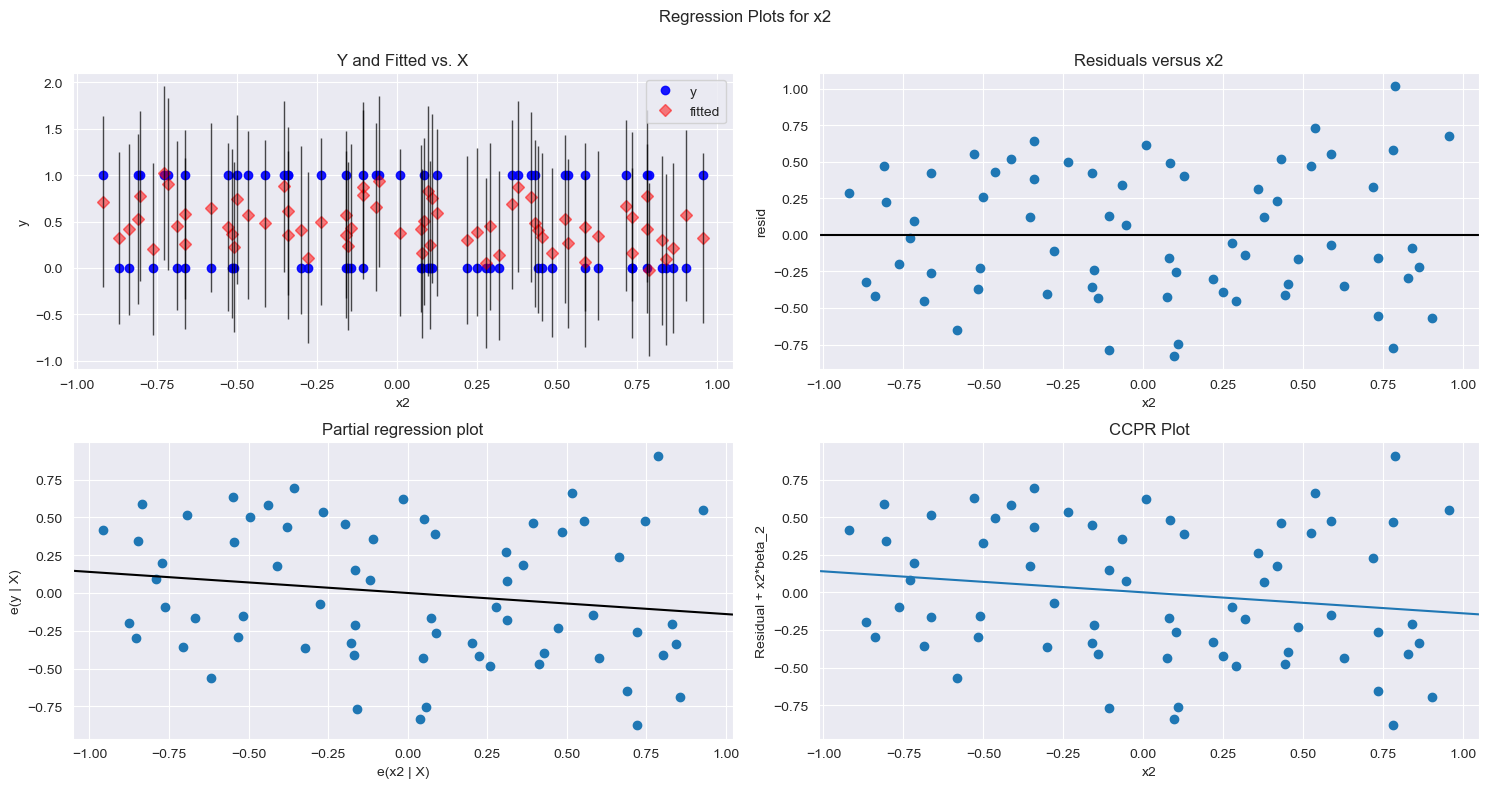

In [12]:

fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(LR, "x2", fig=fig)

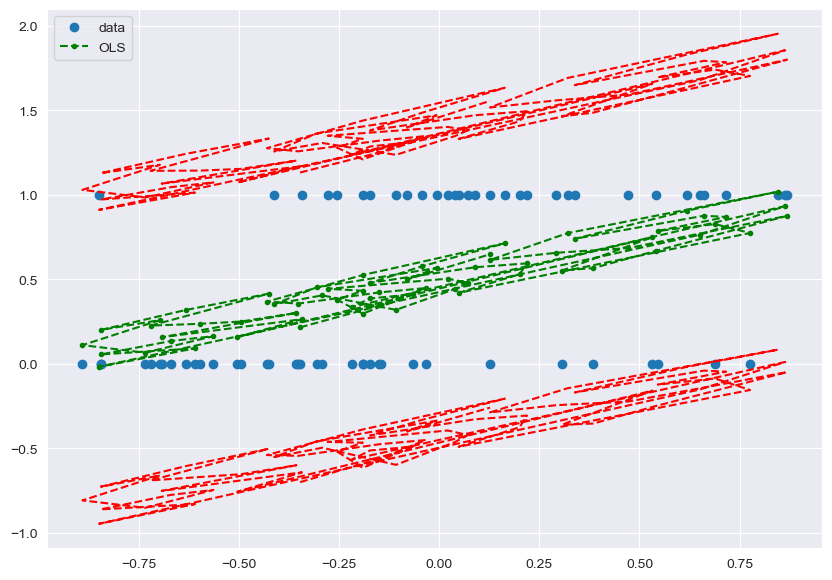

In [13]:

x = df[['x1']]
y = df[['y']]

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(LR)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, y, 'o', label="data")

ax.plot(x, LR.fittedvalues, 'g--.', label="OLS")
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [14]:
# again, invoke statsmodel's formula API using the below syntax
LR = ols("""y~ x1+x2""", data=df).fit()
# summarize our model
LR_summary = housing_model.summary()
HTML(LR_summary.as_html())

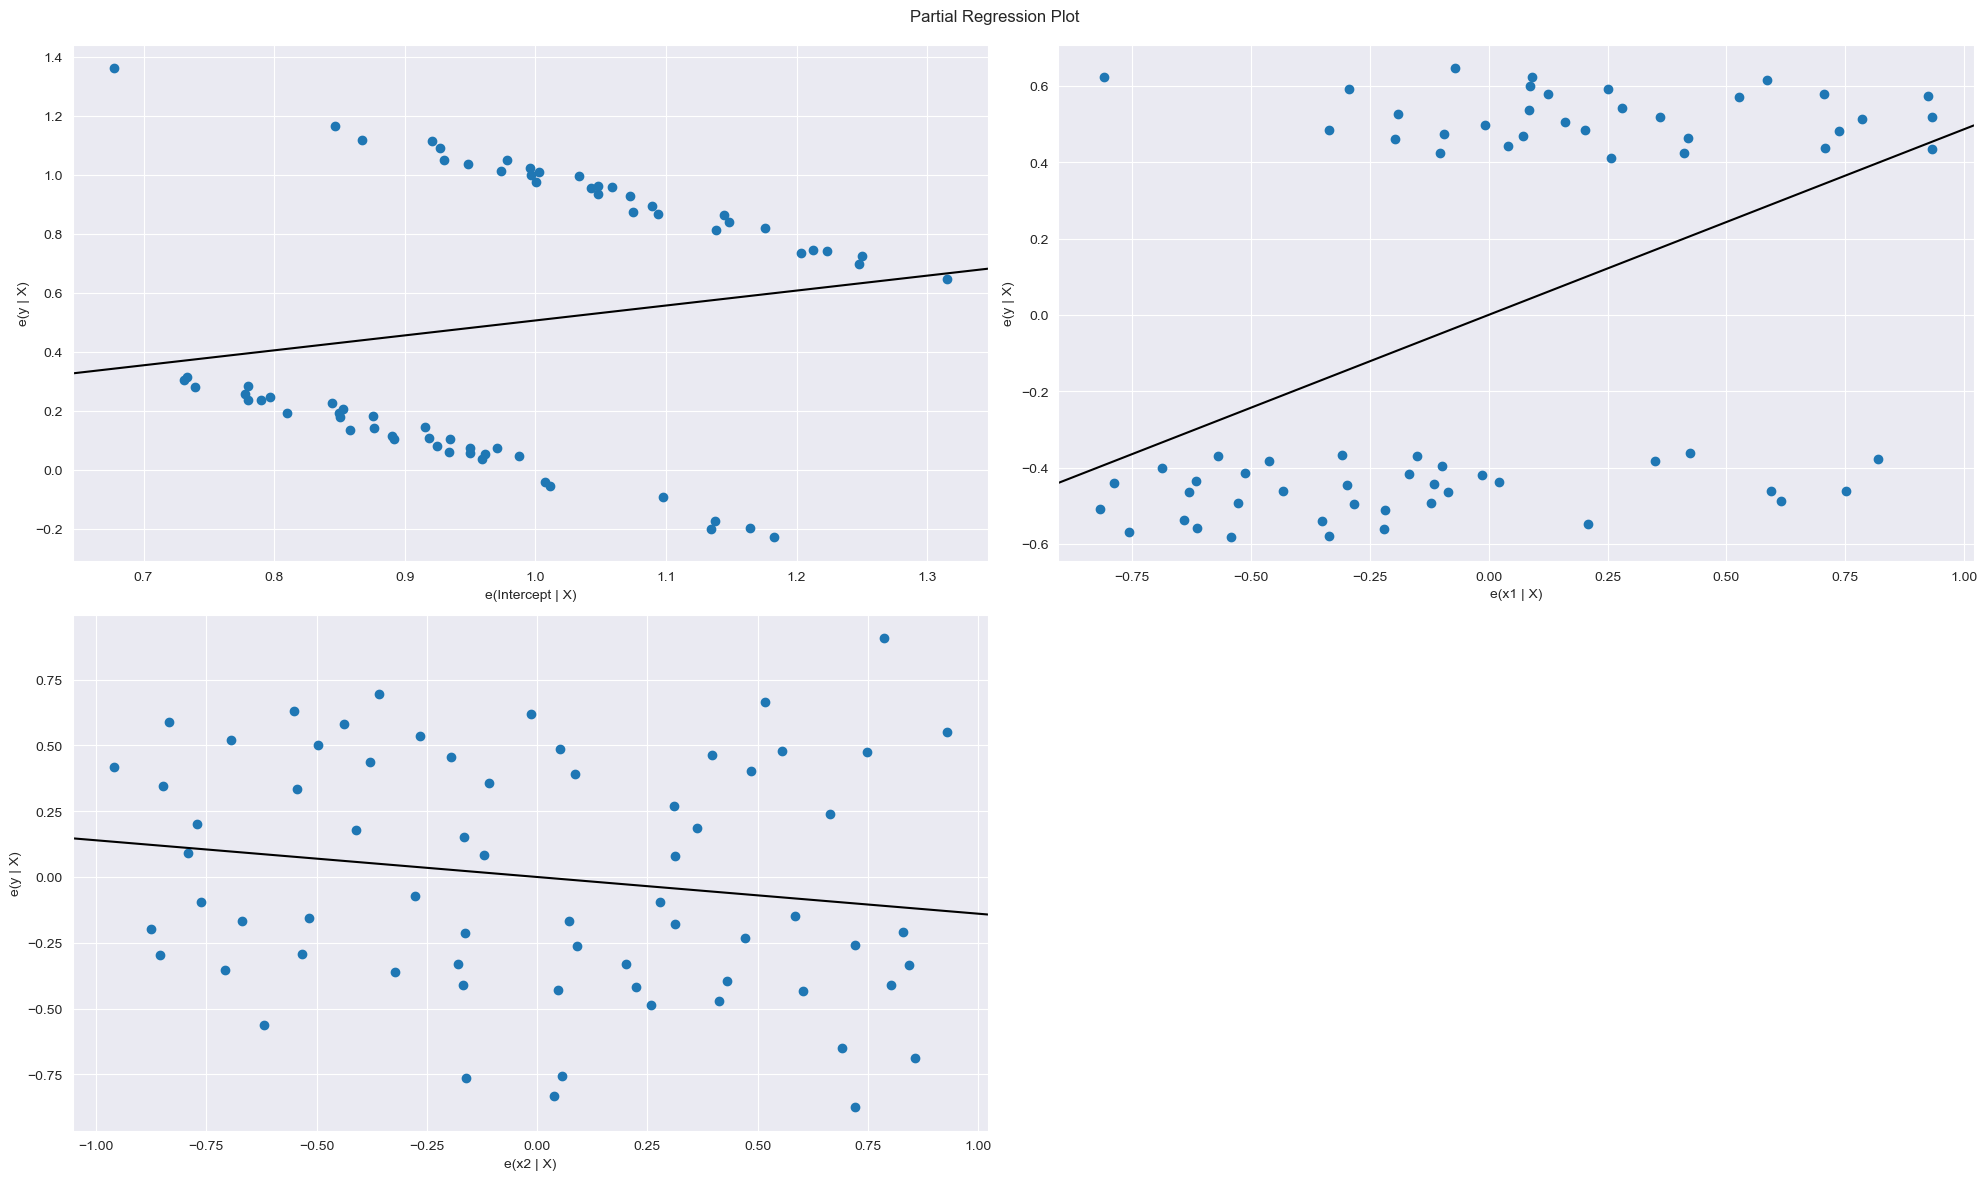

In [15]:


fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)